In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
data = pd.read_csv("data.txt", sep='  ', header=None)

C:\Users\Vineeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [27]:
x = data.iloc[:,:16]
y = data.iloc[:,16:18]

x = x.drop(columns = [8,11,0,1,3,5,6,13])

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

In [13]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [14]:
def dsigmoid(x):
    return x*(1-x)

In [15]:
np.random.seed(3) #generates a value between 3
w0 = np.random.random((8,50)) - 1 #between layers 0 and 1
w1 = np.random.random((50,26)) - 1 #between layers 1 and 2
w2 = np.random.random((26,8)) - 1
w3 = np.random.random((8,2)) - 1

b0 = np.random.random((1,1)) - 1
b1 = np.random.random((1,1)) - 1
b2 = np.random.random((1,1)) - 1
b3 = np.random.random((1,1)) - 1

In [30]:
def feed_forward(data_in , w0, w1 ,w2,w3, b0,b1,b2,b3):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0,w0)+b0)
    layer2 = sigmoid(np.dot(layer1,w1)+b1)
    layer3 = sigmoid(np.dot(layer2,w2)+b2)
    layer4 = np.dot(layer3,w3)+b3
    
    return layer0,layer1,layer2,layer3,layer4

In [31]:
def back_propogation(layer0,layer1,layer2,layer3,layer4, actual_y, w0,w1,w2,w3,b0,b1,b2,b3,learning_rate, i):
    
    l4_error = layer4 - actual_y
    l4_delta = l4_error
    dh4 = np.dot(layer3.T,l4_delta)
    
    l3_error = np.dot(l4_delta,w3.T)
    l3_delta = l3_error * dsigmoid(layer3)
    dh3 = np.dot(layer2.T, l3_delta) #layer 1 change
    
    l2_error = np.dot(l3_delta,w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T,l2_delta)#layer2 changes
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)#layer 3 changes
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
   # b3 = b3 - (learning_rate * np.mean(l4_delta))
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))#we use l2_delta as we get a unit value when differentiation with b is done
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
    if i%1 == 0 and (i!=0):
        loss = np.mean(np.power(layer4 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print('\n', int(i),loss)
    
    return w0,w1,w2,w3,b0,b1,b2,b3
    

In [32]:
epochs = 10000
loss_curve = []
iters = []


In [33]:
for i in range(epochs):
    layer0,layer1,layer2,layer3,layer4 = feed_forward(xtrain,w0,w1,w2,w3,b0,b1,b2,b3)
    w0,w1,w2,w3,b0,b1,b2,b3 = back_propogation(layer0,layer1,layer2,layer3,layer4,ytrain, w0,w1,w2,w3,b0,b1,b2,b3,0.001,i)


 1000 16    1.971835
17    2.006917
dtype: float64

 2000 16    1.971937
17    2.006929
dtype: float64

 3000 16    1.971938
17    2.006917
dtype: float64

 4000 16    1.971938
17    2.006910
dtype: float64

 5000 16    1.971938
17    2.006906
dtype: float64

 6000 16    1.971938
17    2.006903
dtype: float64

 7000 16    1.971939
17    2.006901
dtype: float64

 8000 16    1.971939
17    2.006900
dtype: float64

 9000 16    1.971939
17    2.006899
dtype: float64


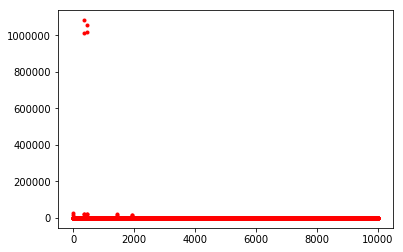

In [39]:
plt.plot(iters,loss_curve,"r.")

In [40]:
layer0,layer1,layer2,layer3,layer4 = feed_forward(xtest,w0,w1,w2,w3,b0,b1,b2,b3)
loss = np.sqrt(np.mean(np.power(layer4-ytest,2)))
loss


16    1.404121
17    1.416701
dtype: float64

In [41]:
c = feed_forward(xtest[:1],w0,w1,w2,w3,b0,b1,b2,b3)
c

(             2         4        7        9      10      12      14     15
 8997  39002.506  9119.494  817.937  686.276  2.983  15.616  43.633  0.864,
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]]),
 array([[0.29853013, 0.29853013, 0.29853013, 0.29853013, 0.29853013,
         0.29853013, 0.29853013, 0.29853013, 0.29853013, 0.29853013,
         0.29853013, 0.29853013, 0.29853013, 0.29853013, 0.29853013,
         0.29853013, 0.29853013, 0.29853013, 0.29853013, 0.29853013,
         0.29853013, 0.29853013, 0.29853013, 0.29853013, 0.29853013,
         0.29853013]]),
 array([[2.81048148e-06, 7.82811236e-46, 0.00000000e+00, 0.00000000e+00,
         4.40474162e-13, 0.00000000e+00, 0.00000000e+00, 1.12019818e-22]]),
 array([[-0.42913932, -0.42914542]]))

In [42]:
ytest[:1]

,16,17
8997,0.988,0.986
